# install libraries

In [94]:
! pip install pandas matplotlib textblob

# import the libraries

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load the dataset

In [96]:
vi = pd.read_csv('revie.csv')

# Display

In [97]:
print(vi.head())

                                             Reviews
0  The product exceeded my expectations and I cou...
1             I love how easy it is to use this tool
2  The customer service was exceptional and very ...
3           This app has made my life so much easier
4  It serves its purpose but lacks any standout f...


In [98]:
print(vi.head(14))

                                              Reviews
0   The product exceeded my expectations and I cou...
1              I love how easy it is to use this tool
2   The customer service was exceptional and very ...
3            This app has made my life so much easier
4   It serves its purpose but lacks any standout f...
5   There are better options available but this on...
6   While it works fine, I did not find anything p...
7         I highly recommend this product to everyone
8   I had high hopes for this product but it fell ...
9   The lack of support made my experience very fr...
10  I was disappointed with the performance of thi...
11  The customer service was unresponsive and frus...
12     This item did not live up to its claims at all
13  I regret purchasing this as it failed to meet ...


# classify reviews as positive, neutral, or negative

In [99]:
def classify_review(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# classification to the reviews

In [100]:
vi['Sentiment'] = vi['Reviews'].apply(classify_review)

# # Finding positive reviews

In [101]:
positive_reviews = vi[vi['Sentiment'] == 'Positive']
print("Positive Reviews:")
print(positive_reviews)

Positive Reviews:
                                              Reviews Sentiment
1              I love how easy it is to use this tool  Positive
2   The customer service was exceptional and very ...  Positive
3            This app has made my life so much easier  Positive
5   There are better options available but this on...  Positive
6   While it works fine, I did not find anything p...  Positive
7         I highly recommend this product to everyone  Positive
8   I had high hopes for this product but it fell ...  Positive
21   The quality is outstanding and worth every penny  Positive
22  The product works as described but nothing spe...  Positive
23  I had a decent experience but I expected more ...  Positive
24  The service was okay but could use some improv...  Positive
27  The delivery was timely but the packaging coul...  Positive
32    I was pleasantly surprised by how well it works  Positive
33  This is the best investment I have made in a l...  Positive
34  The design is slee

# Finding neutral reviews

In [102]:
neutral_reviews = vi[vi['Sentiment'] == 'Neutral']
print("Neutral Reviews:")
print(neutral_reviews)

Neutral Reviews:
                                              Reviews Sentiment
0   The product exceeded my expectations and I cou...   Neutral
4   It serves its purpose but lacks any standout f...   Neutral
14  The quality is subpar and I would not recommen...   Neutral
19  I wish I had read the reviews before making th...   Neutral
20  This exceeded my expectations in every way pos...   Neutral
25  It gets the job done but lacks some features I...   Neutral
26  I feel indifferent about the overall quality o...   Neutral
29  I appreciate the effort but it did not stand o...   Neutral
30  It functions properly but I might not purchase...   Neutral
31          My expectations were met but not exceeded   Neutral
36  This exceeded my expectations in every way pos...   Neutral
37  I will definitely be recommending this to my f...   Neutral


# Finding negative reviews

In [103]:
negative_reviews = vi[vi['Sentiment'] == 'Negative']
print("Negative Reviews:")
print(negative_reviews)

Negative Reviews:
                                              Reviews Sentiment
9   The lack of support made my experience very fr...  Negative
10  I was disappointed with the performance of thi...  Negative
11  The customer service was unresponsive and frus...  Negative
12     This item did not live up to its claims at all  Negative
13  I regret purchasing this as it failed to meet ...  Negative
15  It broke after just a few uses which is unacce...  Negative
16  I found it difficult to navigate and not user-...  Negative
17  The instructions were unclear and confusing to...  Negative
18  This experience has left me feeling dissatisfi...  Negative
28  This product is average and meets basic needs ...  Negative


# Duplicate review detector

In [104]:
duplicate_reviews = vi[vi.duplicated(['Reviews'], keep=False)]  # Replace 'Review' with your column name
print("Duplicate Reviews:")
print(duplicate_reviews)

Duplicate Reviews:
                                              Reviews Sentiment
20  This exceeded my expectations in every way pos...   Neutral
36  This exceeded my expectations in every way pos...   Neutral


# # Plotting comparison graph

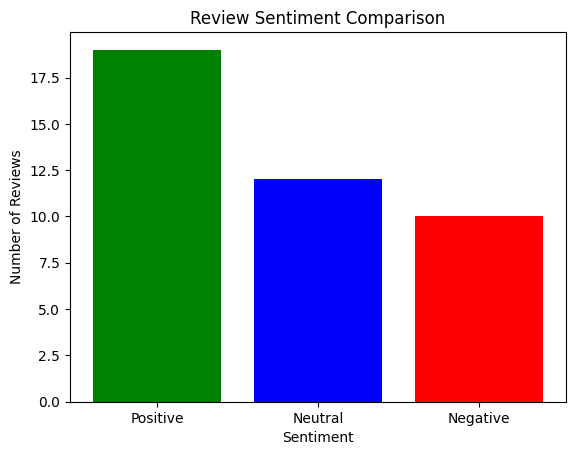

In [105]:
sentiment_counts = vi['Sentiment'].value_counts()
colors = {'Positive': 'green', 'Neutral': 'blue', 'Negative': 'red'}
plt.bar(sentiment_counts.index, sentiment_counts.values, color=[colors[sentiment] for sentiment in sentiment_counts.index])
plt.title('Review Sentiment Comparison')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Count

In [106]:
sentiment_counts = vi['Sentiment'].value_counts()

# Plotting the line chart

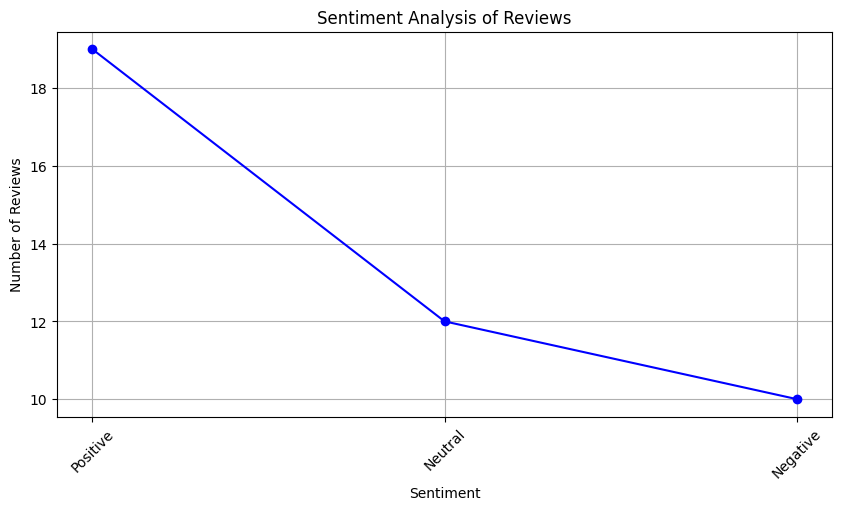

In [107]:
plt.figure(figsize=(10, 5))
plt.plot(sentiment_counts.index, sentiment_counts.values, marker='o', color='b')
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Create a DataFrame for plotting


In [108]:
sentiment_df = pd.DataFrame({
    'Sentiment': sentiment_counts.index,
    'Count': sentiment_counts.values
})

# Plotting the color  dot chart

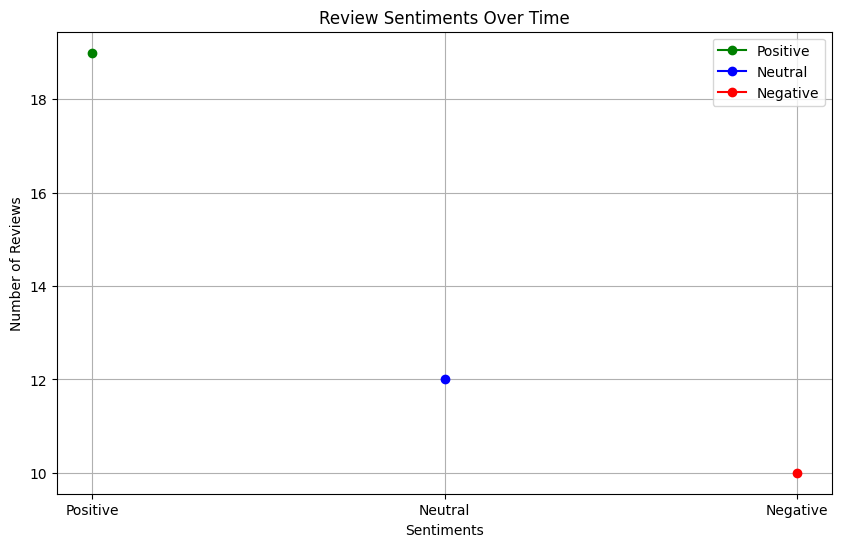

In [109]:
plt.figure(figsize=(10, 6))

# Plot positive sentiment
plt.plot(sentiment_df[sentiment_df['Sentiment'] == 'Positive'].index, 
         sentiment_df[sentiment_df['Sentiment'] == 'Positive']['Count'], 
         marker='o', color='green', label='Positive')

# Plot neutral sentiment
plt.plot(sentiment_df[sentiment_df['Sentiment'] == 'Neutral'].index, 
         sentiment_df[sentiment_df['Sentiment'] == 'Neutral']['Count'], 
         marker='o', color='blue', label='Neutral')

# Plot negative sentiment
plt.plot(sentiment_df[sentiment_df['Sentiment'] == 'Negative'].index, 
         sentiment_df[sentiment_df['Sentiment'] == 'Negative']['Count'], 
         marker='o', color='red', label='Negative')

# Adding titles and labels
plt.title('Review Sentiments Over Time')
plt.xlabel('Sentiments')
plt.ylabel('Number of Reviews')
plt.xticks(sentiment_df.index, sentiment_df['Sentiment'])
plt.legend()
plt.grid()

# Show the plot
plt.show()

# Create a pie chart

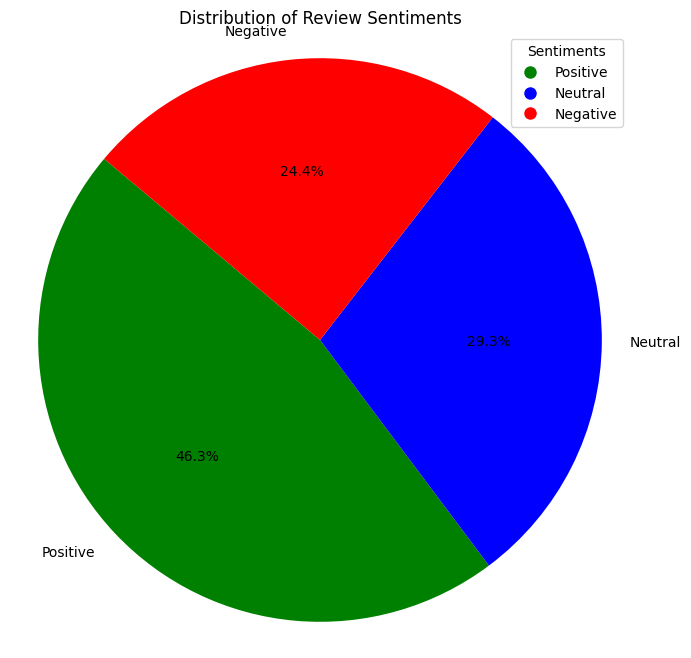

In [110]:
# Create a pie chart
plt.figure(figsize=(8, 8))
colors = ['green', 'blue', 'red']  # Define colors for each sentiment
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Review Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add custom legend with colored dots
labels = ['Positive', 'Neutral', 'Negative']
patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
plt.legend(patches, labels, title="Sentiments")

# Show the plot
plt.show()

# Create a scatter plot


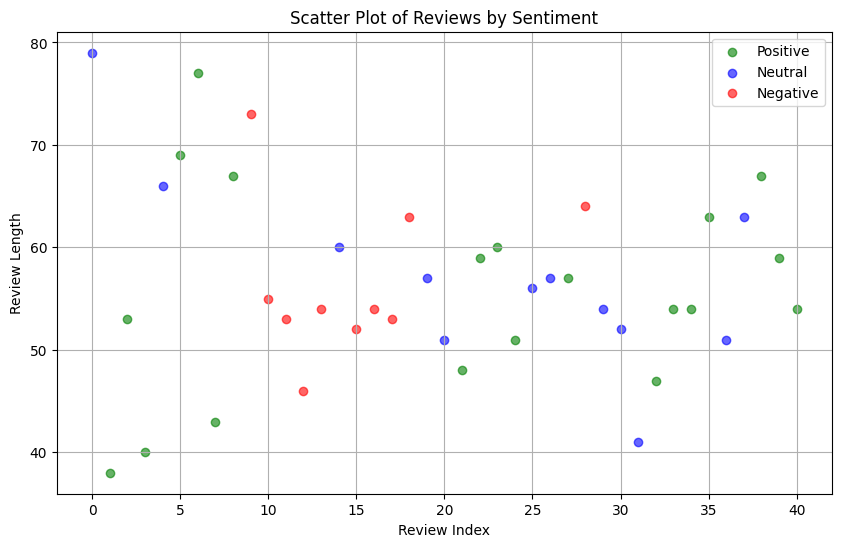

In [111]:
# Define colors for each sentiment
plt.figure(figsize=(10, 6))

colors = {
    'Positive': 'green',
    'Neutral': 'blue',
    'Negative': 'red'
}

# Plot each sentiment with different colors
for sentiment, color in colors.items():
    subset = vi[vi['Sentiment'] == sentiment]
    plt.scatter(subset.index, subset['Reviews'].str.len(),  # Using review length as y-axis
                color=color, label=sentiment, alpha=0.6)

# Adding titles and labels
plt.title('Scatter Plot of Reviews by Sentiment')
plt.xlabel('Review Index')
plt.ylabel('Review Length')
plt.legend()
plt.grid()

# Show the plot
plt.show()